# Model training

#### BTC-USDT for ROR_n10

```
model_id: 86d66a6e6bd12ae7df0a5a0a2c84b6832d0ab28c
    - n_estimators = 500
    - max_depth = 10
    - Mean Absolute Error: 0.01117
    - Mean Absolute Outcome: 0.02363
    - Mean Absolute Percent Error: 0.47276
    - Error Variance: 0.00035
    - R-Squared: 0.7296
```

```

```

```
```

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [8]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [9]:
# Load model data
data = dataObject("""
SELECT * EXCEPT (
  conversionType,
  conversionSymbol,
  partition_date)
FROM `algom-trading.train_features.features_BTC_USDT_hour_i02_*`
WHERE _table_suffix in (
    '20170101',
    '20180101',
    '20190101')
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 30003/30003 [00:34<00:00, 880.38rows/s] 

SUCCESS: Loaded SQL query.


In [10]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

21572


,ticker_time_sec,close,high,low,open,volume_base,volume,etl_time,ticker_time,ticker,...,MACDdiff_9_12,MACD_26_200,MACDsign_26_200,MACDdiff_26_200,MACD_20_200,MACDsign_20_200,MACDdiff_20_200,RSI_,Mass_Index_9_25,SO_pct_k
101,1513684800,17550.50,17900.00,17100.00,17250.00,791.19,13857411.78,2021-01-01 15:39:58.759132+00:00,2017-12-19 12:00:00+00:00,BTC-USDT,...,-17251.800497,1852.784576,17303.069127,-15450.284550,1949.818901,17303.069127,-15353.250226,0.438316,26.035603,0.563125
102,1513681200,17250.00,17800.00,16550.22,16852.00,1130.93,19489019.97,2021-01-01 15:39:58.759132+00:00,2017-12-19 11:00:00+00:00,BTC-USDT,...,-17251.523498,1847.692983,17292.455301,-15444.762319,1940.240158,17292.455301,-15352.215143,0.246768,26.037580,0.559923
103,1513677600,16852.00,18259.40,16300.00,18234.89,1664.19,28672615.09,2021-01-01 15:39:58.759132+00:00,2017-12-19 10:00:00+00:00,BTC-USDT,...,-17190.058344,1816.286878,17204.364241,-15388.077363,1895.998808,17204.364241,-15308.365433,0.513338,26.281003,0.281719
104,1513674000,18234.89,18695.20,18165.99,18620.01,493.80,9092425.54,2021-01-01 15:39:58.759132+00:00,2017-12-19 09:00:00+00:00,BTC-USDT,...,-17350.801676,1874.098119,17410.469393,-15536.371274,1971.762590,17410.469393,-15438.706803,0.676331,26.381577,0.130194
105,1513670400,18620.01,18650.02,18545.11,18562.01,336.16,6252763.69,2021-01-01 15:39:58.759132+00:00,2017-12-19 08:00:00+00:00,BTC-USDT,...,-17546.064495,1950.137445,17652.377514,-15702.240069,2070.303219,17652.377514,-15582.074296,0.676331,26.382349,0.713945


<br>

### Initialize modelRegression class

In [11]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n15',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)


SUCCESS: Loaded dataObject.
Initialized model. As a next step, run self.predict() or self.train().


In [ ]:
# Specify regression parameters
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(
    loss='ls', 
    learning_rate=0.1,
    n_estimators=500,
    subsample=.9,
    criterion='friedman_mse', 
    min_samples_split=3, 
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0, 
    max_depth=10,
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    init=None,
    random_state=None, 
    max_features=None, 
    alpha=0.9, 
    verbose=0,
    max_leaf_nodes=None, 
    warm_start=False, 
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001
)


# Train model
model.train(reg)


Training model on ROR_n15.


In [ ]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


In [ ]:
# Save model (optional)
model.save()


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [8]:
start_date='2019-06-01'
end_date='2019-07-01'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


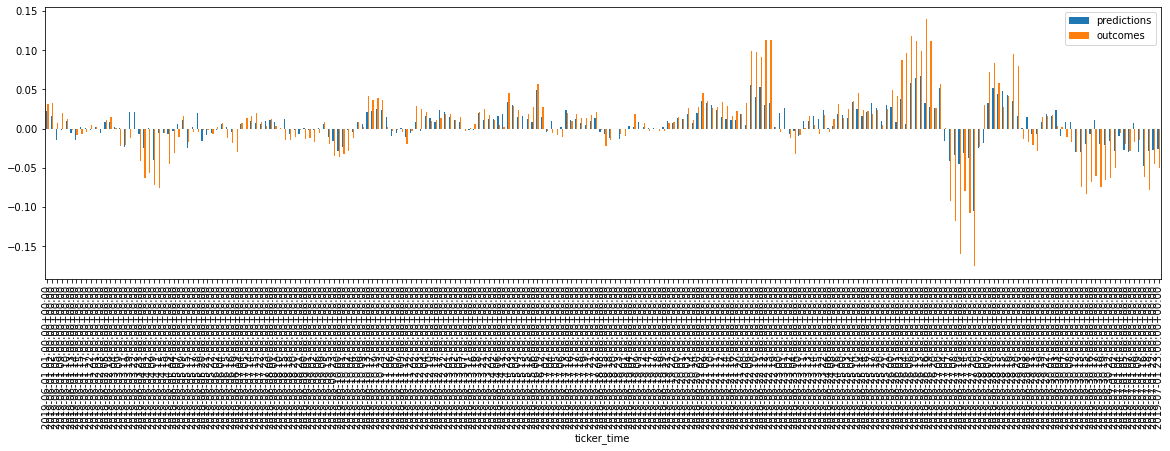

In [9]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


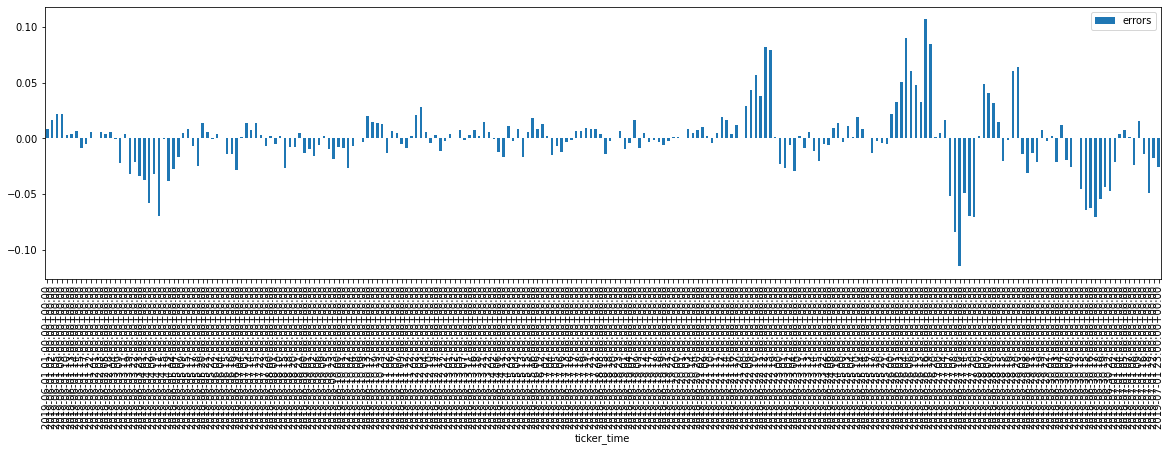

In [10]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


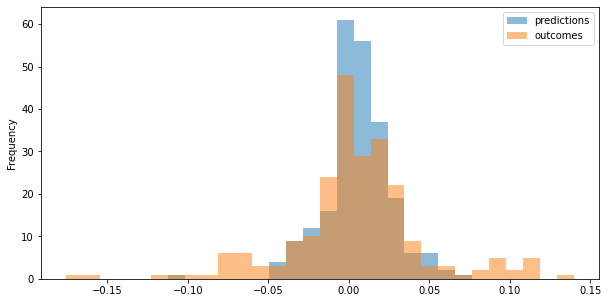

In [11]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


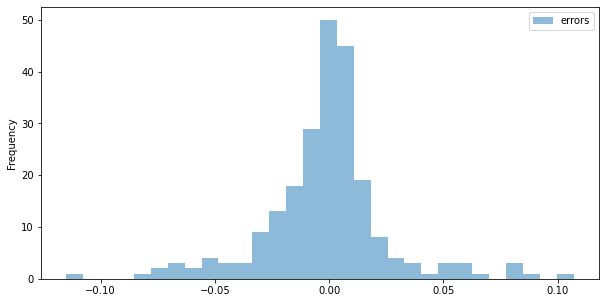

In [12]:
model_plot.plot_errors_histogram(start_date, end_date)


PLOT: Predictions by Date


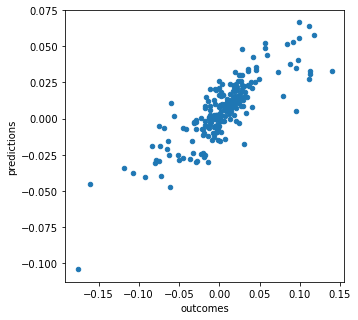

In [13]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### Most important features


In [14]:
features = model.feature_importance.feature_importance
features[0:30]


,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
0,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,ATR_,0.05451,1.0,1.000000
1,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,MACDdiff_20_200,0.03660,2.0,0.986486
2,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,Mass_Index_9_25,0.03557,3.0,0.972973
3,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,BollingerB_200,0.03166,4.0,0.959459
4,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,BollingerB_150,0.03127,5.0,0.945946
5,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,BollingerB_50,0.03056,6.0,0.932432
6,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,AROR_300,0.02924,7.0,0.918919
7,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,BollingerB_100,0.02870,8.0,0.905405
8,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,AROR_250,0.02653,9.0,0.891892
9,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,MACDdiff_26_200,0.02576,10.0,0.878378


<br>

### Least import features

In [15]:
features[len(features)-20:len(features)]

,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
54,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,AROR_6,0.00784,55.0,0.270270
55,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,AROR_volume_3,0.00770,56.0,0.256757
56,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,AROR_5,0.00741,57.0,0.243243
57,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,Bollinger_pct_b_5,0.00731,58.0,0.229730
58,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,AROR_4,0.00728,59.0,0.216216
59,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,AROR_9,0.00702,60.0,0.202703
60,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,Bollinger_pct_b_150,0.00638,61.0,0.189189
61,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,MACDdiff_9_12,0.00630,62.0,0.175676
62,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,Bollinger_pct_b_50,0.00594,63.0,0.162162
63,c1cc47192aa45b71285e69c7a23c932473256141,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n15,Bollinger_pct_b_100,0.00588,64.0,0.148649


<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
